In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
# 1. Create a DataFrame for the Presidential Election data. 
file_path =(r"C:\Users\emadn\Class\GoVote\Resources\go_vote.csv")
ml_df = pd.read_csv(file_path)
ml_df.head()

,Voter ID,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election
0,704844,SEVEN HILLS,NOPTY,1959,44131,0,D,0,D,t,t,t,t
1,1658758,PARMA,REP,1968,44130,0,R,R,D,t,t,t,t
2,2005536,BROADVIEW HTS,REP,1976,44147,0,R,R,D,t,t,t,t
3,2465762,SOLON,NOPTY,1991,44139,0,0,0,0,f,f,t,f
4,710633,INDEPENDENCE,REP,1968,44131,0,R,R,0,t,t,t,t


In [5]:
#Replace True and False Values with 0 and 1
ml_df.replace(('f', 't'), (0, 1), inplace=True)

In [6]:
ml_df.shape

(870075, 13)

In [7]:
#Column Datatypes
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870075 entries, 0 to 870074
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Voter ID               870075 non-null  int64 
 1   City                   870075 non-null  object
 2   Party                  870075 non-null  object
 3   Birth Year             870075 non-null  int64 
 4   Zip Code               870075 non-null  int64 
 5   2020 Primary Election  870075 non-null  object
 6   2016 Primary Election  870075 non-null  object
 7   2012 Primary Election  870075 non-null  object
 8   2008 Primary Election  870075 non-null  object
 9   2020 General Election  870075 non-null  int64 
 10  2016 General Election  870075 non-null  int64 
 11  2012 General Election  870075 non-null  int64 
 12  2008 General Election  870075 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 86.3+ MB


In [9]:
# Set voter_id_org column as index
ml_df =ml_df.set_index('Voter ID')

In [10]:
# ml_df["2020 Primary Election"].unique()
ml_df["2016 Primary Election"].unique()
# ml_df["2012 Primary Election"].unique()
# ml_df["2008 Primary Election"].unique()

array(['D', 'R', '0', 'N', ' ', 'G', 'X'], dtype=object)

In [13]:
# Hand categorical data
# code primary election data into integers
#D is Democrat, R is Republican, L is Libertarian, G is Green, 0, " ", X and N is non-party, issues only ballot

party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 4}
ml_df['2020 Primary Election'] = ml_df['2020 Primary Election'].apply(lambda x:party[x])
ml_df['2020 Primary Election']

Voter ID
704844     3
1658758    3
2005536    3
2465762    3
710633     3
          ..
89841      3
689381     0
823935     1
276903     3
3017222    3
Name: 2020 Primary Election, Length: 870075, dtype: int64

In [14]:
party={"D": 0, "R": 1, "L": 2, "0": 3, "N": 3, " ": 3, "G": 4, "X": 3}
ml_df['2016 Primary Election'] = ml_df['2016 Primary Election'].apply(lambda x:party[x])
ml_df['2012 Primary Election'] = ml_df['2012 Primary Election'].apply(lambda x:party[x])
ml_df['2008 Primary Election'] = ml_df['2008 Primary Election'].apply(lambda x:party[x])

In [15]:
ml_df.head()

,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election
Voter ID,,,,,,,,,,,,
704844,SEVEN HILLS,NOPTY,1959,44131,3,0,3,0,1,1,1,1
1658758,PARMA,REP,1968,44130,3,1,1,0,1,1,1,1
2005536,BROADVIEW HTS,REP,1976,44147,3,1,1,0,1,1,1,1
2465762,SOLON,NOPTY,1991,44139,3,3,3,3,0,0,1,0
710633,INDEPENDENCE,REP,1968,44131,3,1,1,3,1,1,1,1


In [16]:
ml_df["Party"].unique()

array(['NOPTY', 'REP', 'DEM', 'GRE', 'LIB'], dtype=object)

In [17]:
# Handle Categorical "Party" columns
P_ID = {"DEM": 0, "REP": 1,"LIB": 2, "NOPTY": 3, "GRE": 4}
ml_df["Party"] = ml_df["Party"].apply(lambda x:P_ID[x])
ml_df.head()

,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election
Voter ID,,,,,,,,,,,,
704844,SEVEN HILLS,3,1959,44131,3,0,3,0,1,1,1,1
1658758,PARMA,1,1968,44130,3,1,1,0,1,1,1,1
2005536,BROADVIEW HTS,1,1976,44147,3,1,1,0,1,1,1,1
2465762,SOLON,3,1991,44139,3,3,3,3,0,0,1,0
710633,INDEPENDENCE,1,1968,44131,3,1,1,3,1,1,1,1


In [22]:
# Establish the generation bins and group names.

generation_bins = [0, 1945, 1964, 1980, 1996, 2014]
group_names = ["Silent","Boomers", "Generation X", "Millenials", "Generation Z"]

In [23]:
ml_df["City"].unique()

array(['SEVEN HILLS', 'PARMA', 'BROADVIEW HTS', 'SOLON', 'INDEPENDENCE',
       'EUCLID', 'CLEVELAND HTS', 'GARFIELD HTS', 'CLEVELAND',
       'ROCKY RIVER', 'WESTLAKE', 'ORANGE', 'PEPPER PIKE', 'MAPLE HTS',
       'EAST CLEVELAND', 'BROOK PARK', 'NORTH ROYALTON', 'HIGHLAND HTS',
       'WARRENSVILLE HTS', 'FAIRVIEW PARK', 'SOUTH EUCLID', 'BEREA',
       'MIDDLEBURG HTS', 'LAKEWOOD', 'LYNDHURST', 'SHAKER HTS',
       'BROOKLYN', 'OLMSTED FALLS', 'UNIVERSITY HTS', 'GATES MILLS',
       'MAYFIELD HTS', 'PARMA HTS', 'BEACHWOOD', 'RICHMOND HTS',
       'BRECKSVILLE', 'BEDFORD', 'BEDFORD HTS', 'OAKWOOD',
       'NORTH OLMSTED', 'OLMSTED TWP', 'STRONGSVILLE', 'BROOKLYN HTS',
       'NEWBURGH HTS', 'BAY VILLAGE', 'MORELAND HILLS', 'WALTON HILLS',
       'CUYAHOGA HTS', 'VALLEY VIEW', 'MAYFIELD VILLAGE', 'BENTLEYVILLE',
       'GLENWILLOW', 'CHAGRIN FALLS', 'HUNTING VALLEY', 'BRATENAHL',
       'WOODMERE', 'HIGHLAND HILLS', 'NORTH RANDALL', 'LINNDALE',
       'CHAGRIN FALLS TWP'], dtype=object

In [24]:
# Code the cities to unique #s
cities = {'SEVEN HILLS': 1, 'PARMA': 2, 'BROADVIEW HTS': 3, 'SOLON': 4, 'INDEPENDENCE': 5,
       'EUCLID': 6, 'CLEVELAND HTS': 7, 'GARFIELD HTS': 8, 'CLEVELAND': 9,
       'ROCKY RIVER': 10, 'WESTLAKE': 11, 'ORANGE': 12, 'PEPPER PIKE':13, 'MAPLE HTS':14,
       'EAST CLEVELAND':15, 'BROOK PARK':16, 'NORTH ROYALTON':17, 'HIGHLAND HTS':18,
       'WARRENSVILLE HTS':19, 'FAIRVIEW PARK':20, 'SOUTH EUCLID':21, 'BEREA':22,
       'MIDDLEBURG HTS':23, 'LAKEWOOD':24, 'LYNDHURST':25, 'SHAKER HTS':25,
       'BROOKLYN':27, 'OLMSTED FALLS':28, 'UNIVERSITY HTS':29, 'GATES MILLS':30,
       'MAYFIELD HTS':31, 'PARMA HTS':32, 'BEACHWOOD':33, 'RICHMOND HTS':33,
       'BRECKSVILLE':34, 'BEDFORD':35, 'BEDFORD HTS':36, 'OAKWOOD':37,
       'NORTH OLMSTED':38, 'OLMSTED TWP':39, 'STRONGSVILLE':40, 'BROOKLYN HTS':41,
       'NEWBURGH HTS':42, 'BAY VILLAGE':43, 'MORELAND HILLS':44, 'WALTON HILLS':45,
       'CUYAHOGA HTS':46, 'VALLEY VIEW':47, 'MAYFIELD VILLAGE':48, 'BENTLEYVILLE':49,
       'GLENWILLOW':50, 'CHAGRIN FALLS':51, 'HUNTING VALLEY':52, 'BRATENAHL':53,
       'WOODMERE':54, 'HIGHLAND HILLS':55, 'NORTH RANDALL':56, 'LINNDALE': 57,
       'CHAGRIN FALLS TWP': 58}

ml_df["City"] = ml_df["City"].apply(lambda x:cities[x])
ml_df.head()

,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election
Voter ID,,,,,,,,,,,,
704844,1,3,1959,44131,3,0,3,0,1,1,1,1
1658758,2,1,1968,44130,3,1,1,0,1,1,1,1
2005536,3,1,1976,44147,3,1,1,0,1,1,1,1
2465762,4,3,1991,44139,3,3,3,3,0,0,1,0
710633,5,1,1968,44131,3,1,1,3,1,1,1,1


In [26]:
# Establish the generation bins and group names.

generation_bins = [0, 1945, 1964, 1980, 1996, 2014]
group_names = ["Silent","Boomers", "Generation X", "Millenials", "Generation Z"]

# Categorize spending based on the bins.
ml_df["Generational_Groups"] = pd.cut(ml_df["Birth Year"], generation_bins, labels=group_names)

ml_df.head()

,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election,Generational_Groups
Voter ID,,,,,,,,,,,,,
704844,1,3,1959,44131,3,0,3,0,1,1,1,1,Boomers
1658758,2,1,1968,44130,3,1,1,0,1,1,1,1,Generation X
2005536,3,1,1976,44147,3,1,1,0,1,1,1,1,Generation X
2465762,4,3,1991,44139,3,3,3,3,0,0,1,0,Millenials
710633,5,1,1968,44131,3,1,1,3,1,1,1,1,Generation X


In [27]:
# Number Generational Bins
group = {"Silent": 1,"Boomers": 2, "Generation X": 3, "Millenials": 4, "Generation Z": 5}
ml_df["Generational_Groups"] = ml_df["Generational_Groups"].apply(lambda x:group[x])
ml_df.head()

,City,Party,Birth Year,Zip Code,2020 Primary Election,2016 Primary Election,2012 Primary Election,2008 Primary Election,2020 General Election,2016 General Election,2012 General Election,2008 General Election,Generational_Groups
Voter ID,,,,,,,,,,,,,
704844,1,3,1959,44131,3,0,3,0,1,1,1,1,2
1658758,2,1,1968,44130,3,1,1,0,1,1,1,1,3
2005536,3,1,1976,44147,3,1,1,0,1,1,1,1,3
2465762,4,3,1991,44139,3,3,3,3,0,0,1,0,4
710633,5,1,1968,44131,3,1,1,3,1,1,1,1,3


In [28]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870075 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   City                   870075 non-null  int64   
 1   Party                  870075 non-null  int64   
 2   Birth Year             870075 non-null  int64   
 3   Zip Code               870075 non-null  int64   
 4   2020 Primary Election  870075 non-null  int64   
 5   2016 Primary Election  870075 non-null  int64   
 6   2012 Primary Election  870075 non-null  int64   
 7   2008 Primary Election  870075 non-null  int64   
 8   2020 General Election  870075 non-null  int64   
 9   2016 General Election  870075 non-null  int64   
 10  2012 General Election  870075 non-null  int64   
 11  2008 General Election  870075 non-null  int64   
 12  Generational_Groups    870075 non-null  category
dtypes: category(1), int64(12)
memory usage: 87.1 MB


In [29]:
ml_df["Birth Year"].value_counts()

1990    18098
1991    18025
1992    17816
1993    17563
1989    17524
        ...  
1931     2071
1930     1877
2004     1567
1929     1459
1928     1234
Name: Birth Year, Length: 77, dtype: int64

In [30]:
corr_matrix = ml_df.corr()
corr_matrix['2020 General Election'].sort_values(ascending=False)

2020 General Election    1.000000
2016 General Election    0.434058
2012 General Election    0.340591
2008 General Election    0.335148
City                     0.109691
Zip Code                 0.051428
2012 Primary Election   -0.241401
Birth Year              -0.279956
2008 Primary Election   -0.287192
2020 Primary Election   -0.295786
2016 Primary Election   -0.335290
Party                   -0.389422
Name: 2020 General Election, dtype: float64

In [31]:
# ml_df['2020percent'] = (ml_df['2020_General_Election'].avg() / 
#                   ml_df['2020_General_Election'].count()) * 100
# ml_df[['City','2020percent']].groupby(["City"], as_index=True).sort_values(by="2020percent", ascending=False)

# Calculate the average test scores.
per_city= ml_df.groupby(["City"]).mean()["2020 General Election"]*100
per_city
# ml_df[["City", "2020_General_Election"]].groupby((["City"]).mean()["2020_General_Election"]*100, as_index=True)

# per_school_reading = school_data_complete_df.groupby(["school_name"]).mean()["reading_score"]

City
1     81.608154
2     73.561847
3     78.779009
4     81.140451
5     85.096565
6     66.864696
7     72.391677
8     63.959750
9     55.112270
10    80.988781
11    79.794409
12    83.916084
13    84.975051
14    64.378409
15    50.058502
16    67.875820
17    78.303649
18    85.876043
19    63.724971
20    82.075091
21    75.049581
22    76.277460
23    79.831382
24    74.610427
25    78.879323
27    70.823146
28    78.317001
29    75.465733
30    83.234127
31    74.817203
32    68.431896
33    77.107818
34    85.034642
35    68.376262
36    69.693349
37    76.758180
38    76.959950
39    78.944693
40    80.406759
41    85.688730
42    62.841016
43    84.670882
44    84.692180
45    84.228769
46    72.749392
47    85.622179
48    84.481394
49    83.776596
50    77.668309
51    78.402107
52    82.022472
53    84.028892
54    68.972746
55    72.745098
56    67.394696
57    41.666667
58    78.378378
Name: 2020 General Election, dtype: float64

In [32]:
ml_df[["City", "2020 General Election"]].groupby(["City"], as_index=True).sum().sort_values(by="2020 General Election", ascending=False)

,2020 General Election
City,
9,134798
2,37621
24,27435
40,26884
25,25930
7,24493
6,22510
11,19639
17,17190


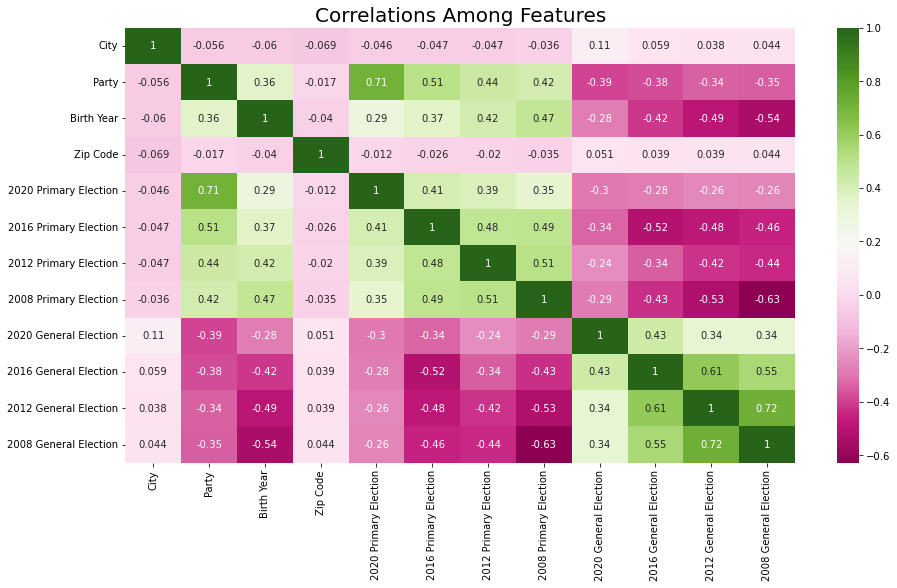

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.subplots(figsize = (15,8))
sb.heatmap(ml_df.corr(), annot=True,cmap="PiYG")
plt.title("Correlations Among Features", fontsize = 20);

<AxesSubplot:xlabel='City', ylabel='2020 General Election'>

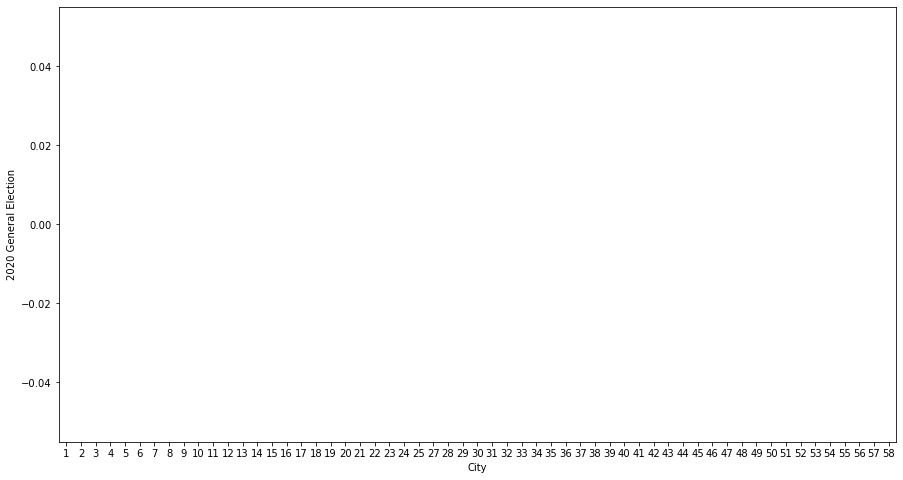

In [34]:
plt.subplots(figsize = (15,8))
sb.barplot(x = "City", y = per_city, data=ml_df, edgecolor=(0,0,0), linewidth=2)
# plt.title("Voting By City Distribution", fontsize = 15)
# plt.ylabel("2020 General Election", fontsize = 15)
# plt.xlabel("Cities",fontsize = 15)
# plt.xticks("City")

In [37]:
ml_df  = ml_df[ml_df['Birth Year'] >= 1928]
ml_df['Birth Year'].describe()

count    870075.000000
mean       1972.083349
std          18.475903
min        1928.000000
25%        1957.000000
50%        1973.000000
75%        1988.000000
max        2004.000000
Name: Birth Year, dtype: float64

In [38]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870075 entries, 704844 to 3017222
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   City                   870075 non-null  int64   
 1   Party                  870075 non-null  int64   
 2   Birth Year             870075 non-null  int64   
 3   Zip Code               870075 non-null  int64   
 4   2020 Primary Election  870075 non-null  int64   
 5   2016 Primary Election  870075 non-null  int64   
 6   2012 Primary Election  870075 non-null  int64   
 7   2008 Primary Election  870075 non-null  int64   
 8   2020 General Election  870075 non-null  int64   
 9   2016 General Election  870075 non-null  int64   
 10  2012 General Election  870075 non-null  int64   
 11  2008 General Election  870075 non-null  int64   
 12  Generational_Groups    870075 non-null  category
dtypes: category(1), int64(12)
memory usage: 87.1 MB


In [39]:
x = ml_df.drop("2020 General Election",axis=1)
y = ml_df["2020 General Election"]

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from warnings import filterwarnings
filterwarnings(action='ignore')


classifiers = [
    
    RandomForestClassifier(n_estimators=100, max_features=3),
    GradientBoostingClassifier(),
    LogisticRegression()]
    


log_cols = ["Classifier", "Accuracy"]
log= pd.DataFrame(columns=log_cols)

In [41]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.3, random_state=0)
acc_dict = {}

for train_index, test_index in sss.split(x, y):
    
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    for clf in classifiers:
        name = clf.__class__.__name__
    
        clf.fit(X_train,y_train)
        predict=clf.predict(X_test)
        acc=accuracy_score(y_test,predict)
        if name in acc_dict:
            acc_dict[name]+=acc
        else:
            acc_dict[name]=acc

Text(0.5, 1.0, 'Classifier Accuracy')

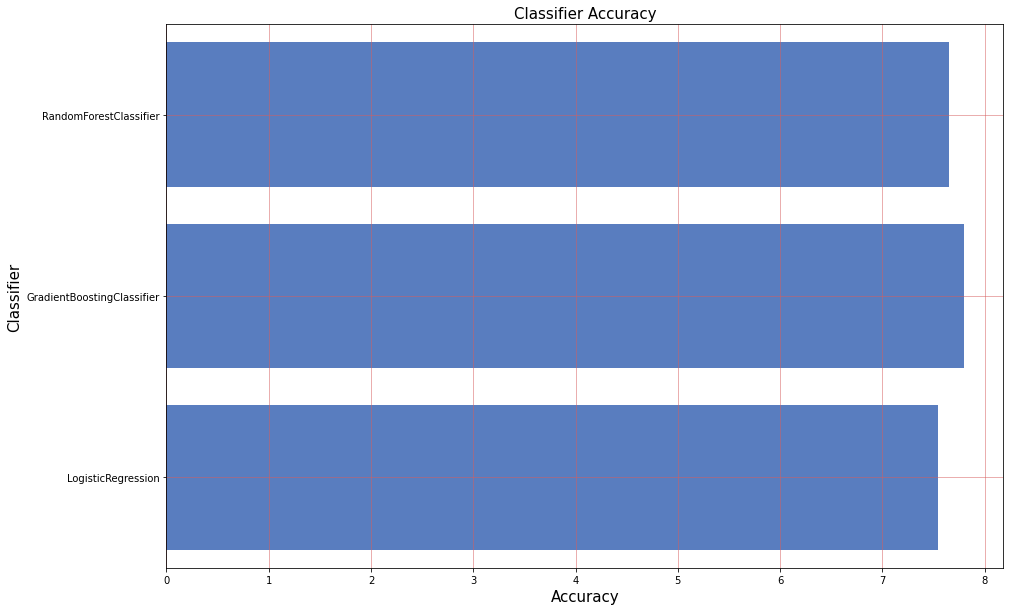

In [42]:
log['Classifier']=acc_dict.keys()
log['Accuracy']=acc_dict.values()
log.set_index([[0,1,2]])
%matplotlib inline
sb.set_color_codes("muted")
ax=plt.subplots(figsize=(15,10))
ax=sb.barplot(y='Classifier',x='Accuracy',data=log,color='b')
ax.set_xlabel('Accuracy',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
plt.grid(color='r', linestyle='-', linewidth=0.5)
plt.title('Classifier Accuracy',fontsize=15)

In [43]:
log['Accuracy'].sort_values(ascending=False)

1    7.794807
0    7.648889
2    7.546327
Name: Accuracy, dtype: float64

In [44]:
log['Classifier']


0        RandomForestClassifier
1    GradientBoostingClassifier
2            LogisticRegression
Name: Classifier, dtype: object

In [46]:
classifier = GradientBoostingClassifier()

In [47]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size = 0.2 , random_state = 33)

classifier.fit(X_train,Y_train)


from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X_train, Y_train,cv=5,
scoring="accuracy").mean()

In [48]:
score 

0.7793940177570899

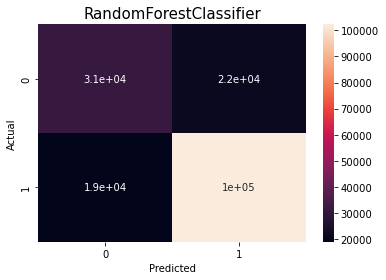

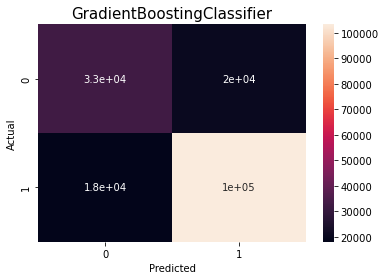

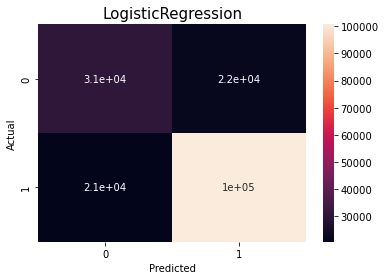

In [49]:
for classifier in classifiers:
    

    classifier.fit(X_train,Y_train)

    p_vals = classifier.predict(X_test)

    confusion_matrix = pd.crosstab(Y_test, p_vals, rownames=['Actual'], colnames=['Predicted'])

    sb.heatmap(confusion_matrix, annot=True)
    plt.title( classifier.__class__.__name__,fontsize=15)
    plt.show()